# Insurance Claim Fraud Detection

# Import Libraries

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix
from xgboost import XGBClassifier
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

# Data Pre-Processing & EDA

In [154]:
# read data
df = pd.read_csv('data/insuranceFraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [155]:
# check data size
df.shape

(1000, 39)

In [156]:
# replace '?' with np.NaN
df = df.replace('?', np.NaN)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,1/21/2015,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NaN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2/17/2015,Vehicle Theft,NaN,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [157]:
# check number of nan values
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [158]:
# check the number of fraud and non-fraud claims
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [159]:
# delete unnecessary column
# df = df.drop(['policy_number','policy_bind_date','insured_zip','incident_location','incident_date' ,'auto_make', 'auto_model'], axis=1)

In [160]:
# check the column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [161]:
# split categoric and numeric features
cat_columns = [col for col in df.columns if df[col].dtypes == object]
cat_columns.remove('fraud_reported')

print(f'Categorical columns:{len(cat_columns)}\n{cat_columns}')

num_columns = [col for col in df.columns if df[col].dtypes != object] 
print(f'Numerical columns:{len(num_columns)}\n{num_columns}')

Categorical columns:20
['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model']
Numerical columns:18
['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


In [162]:
# check numeric columns whether they are categoric or not
df[num_columns].head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009


In [163]:
# check the number of unique values for numeric columns
df[num_columns].nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
capital-gains                   338
capital-loss                    354
incident_hour_of_the_day         24
number_of_vehicles_involved       4
bodily_injuries                   3
witnesses                         4
total_claim_amount              763
injury_claim                    638
property_claim                  626
vehicle_claim                   726
auto_year                        21
dtype: int64

In [164]:
# detailed check the numeric columns with low cardinality 
# check policy_decutible
df['policy_deductable'].value_counts()

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

In [165]:
# check the number of unique values for categoric columns
df[cat_columns].nunique()

policy_bind_date            951
policy_state                  3
policy_csl                    3
insured_sex                   2
insured_education_level       7
insured_occupation           14
insured_hobbies              20
insured_relationship          6
incident_date                60
incident_type                 4
collision_type                3
incident_severity             4
authorities_contacted         5
incident_state                7
incident_city                 7
incident_location          1000
property_damage               2
police_report_available       2
auto_make                    14
auto_model                   39
dtype: int64

In [166]:
# detailed check the categoric columns with high cardinality 
# convert to datetime and check policy_bind_date
pd.to_datetime(df['policy_bind_date']).sort_values()

46    1990-01-08
278   1990-01-27
601   1990-02-01
7     1990-02-03
28    1990-02-08
         ...    
355   2014-12-13
18    2014-12-28
918   2015-01-03
775   2015-01-17
578   2015-02-22
Name: policy_bind_date, Length: 1000, dtype: datetime64[ns]

In [167]:
# convert to datetime and check incident_date
pd.to_datetime(df['incident_date']).sort_values()

630   2015-01-01
41    2015-01-01
310   2015-01-01
806   2015-01-01
478   2015-01-01
         ...    
914   2015-03-01
107   2015-03-01
883   2015-03-01
852   2015-03-01
752   2015-03-01
Name: incident_date, Length: 1000, dtype: datetime64[ns]

In [168]:
# remove incident_location because of high cardinality 
# TODO: check if there is some infortmation to extract from incident_location feature
df = df.drop(['incident_location'], axis=1)

# EDA (Exploratory Data Analysis) 

## Exploring Target (fraud_reported)

In [169]:
# checking value counts for fraud_reported
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

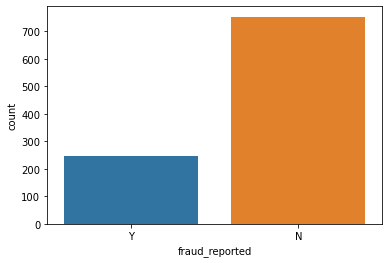

In [170]:
sns.countplot(df['fraud_reported'])

## Exploring Categorical Features

In [171]:
# create new features from policy_bind_date
df['policy_bind_day'] = pd.DatetimeIndex(df['policy_bind_date']).day
df['policy_bind_month'] = pd.DatetimeIndex(df['policy_bind_date']).month
df['policy_bind_year'] = pd.DatetimeIndex(df['policy_bind_date']).year
df['policy_bind_dayofweek'] = pd.DatetimeIndex(df['policy_bind_date']).dayofweek

# create new features from policy_bind_date, no year because we just have 2015
df['incident_day'] = pd.DatetimeIndex(df['incident_date']).day
df['incident_month'] = pd.DatetimeIndex(df['incident_date']).month # 01,02,03 
df['incident_dayofweek'] = pd.DatetimeIndex(df['incident_date']).dayofweek

# remove date policiy_bind_date & incident_date
df = df.drop(['policy_bind_date','incident_date'], axis=1)

# check df
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,policy_bind_dayofweek,incident_day,incident_month,incident_dayofweek
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,17,10,2014,4,25,1,6
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,27,6,2006,1,21,1,2
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,6,9,2000,2,22,2,6
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NaN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,25,5,1990,4,10,1,5
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,NaN,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,6,6,2014,4,17,2,1


In [172]:
# update categoric feature list
cat_columns = [col for col in df.columns if df[col].dtypes == object]
cat_columns.remove('fraud_reported')
cat_columns

['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model']

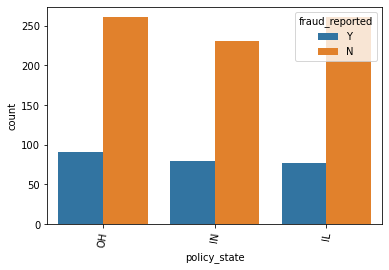

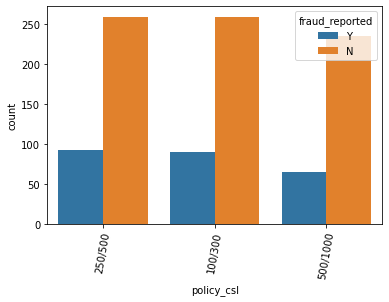

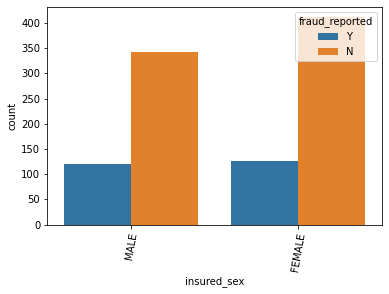

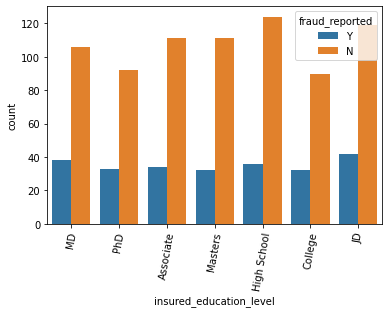

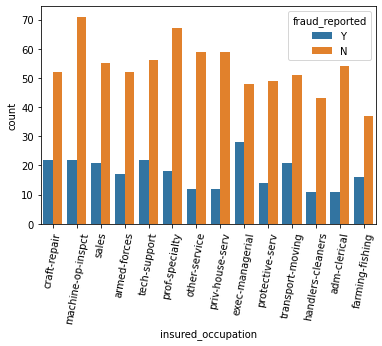

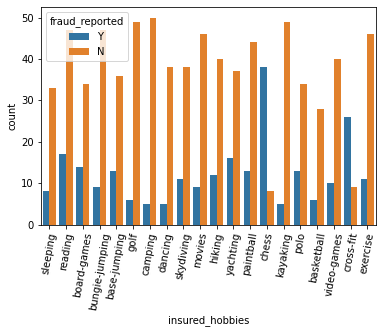

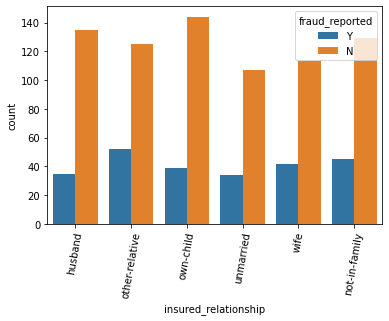

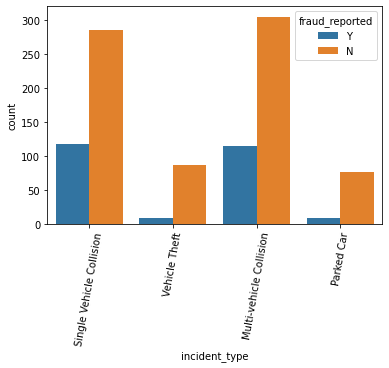

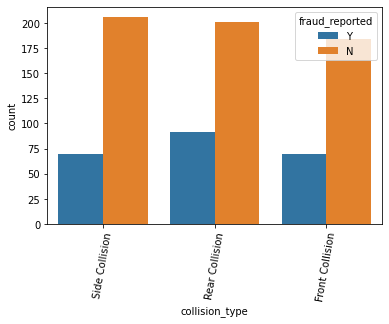

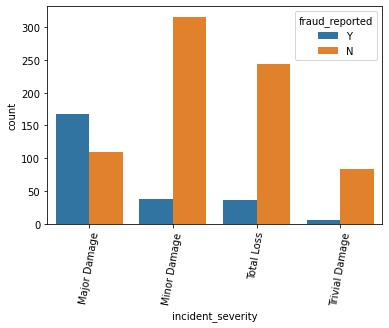

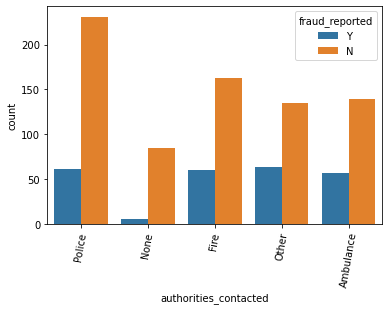

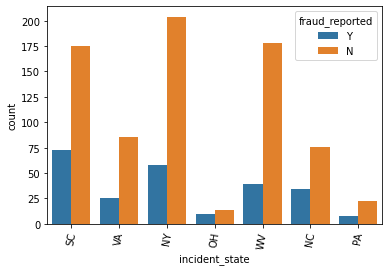

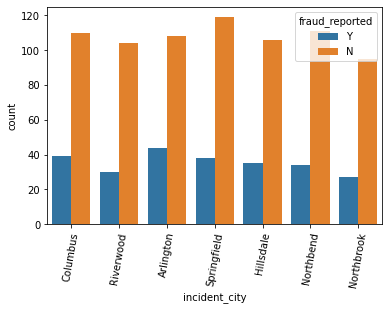

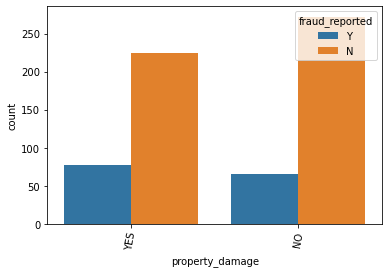

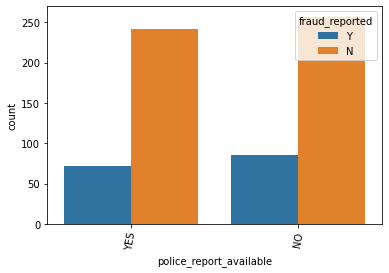

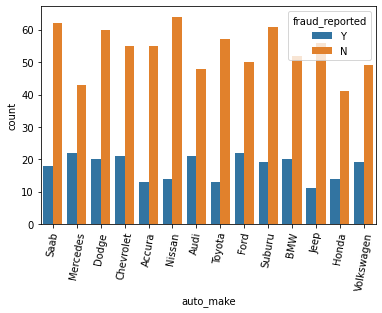

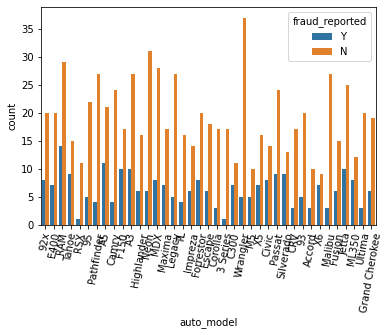

In [173]:
# visualize categorical features vs target
for col in df[cat_columns].columns:
    sns.countplot(data=df ,x=col, hue='fraud_reported')
    plt.xticks(rotation=80)
    plt.show()

In [174]:
# checking unique values for each category 
for col in cat_columns:
    print(f'\n{col.upper()} : {df[col].nunique()}')
    print(df[col].value_counts()) 


POLICY_STATE : 3
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

POLICY_CSL : 3
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

INSURED_SEX : 2
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

INSURED_EDUCATION_LEVEL : 7
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

INSURED_OCCUPATION : 14
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

INSURED_HOBBIES : 20
reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf          

**Observations:**
* Claims made by the insured who are exec-manegerial are more likely to be fraudulent than other occupaticion.
* Claims made by the insured who like to play chess are more likely to be fraudulent.
* Claims made as a result of collision are mostly likely to be fraud.
* Insurance claims made after an accident that resulted in major damage are more prone to fraud.

## Exploring Numerical Features

In [175]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_bind_day,policy_bind_month,policy_bind_year,policy_bind_dayofweek,incident_day,incident_month,incident_dayofweek
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,15.448000,6.559000,2001.604000,3.061000,14.995000,1.496000,3.04700
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,8.808001,3.499824,7.360391,2.004319,8.670995,0.523697,1.97603
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,1.000000,1.000000,1990.000000,0.000000,1.000000,1.000000,0.00000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,8.000000,3.000000,1995.000000,1.000000,7.750000,1.000000,1.00000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,16.000000,7.000000,2002.000000,3.000000,15.000000,1.000000,3.00000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,23.000000,10.000000,2008.000000,5.000000,22.000000,2.000000,5.00000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,31.000000,12.000000,2015.000000,6.000000,31.000000,3.000000,6.00000


In [176]:
# update numerical features
num_columns = [col for col in df.columns if df[col].dtypes != object] 
print(f'Numerical columns:{len(num_columns)}\n{num_columns}')

Numerical columns:25
['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'policy_bind_dayofweek', 'incident_day', 'incident_month', 'incident_dayofweek']


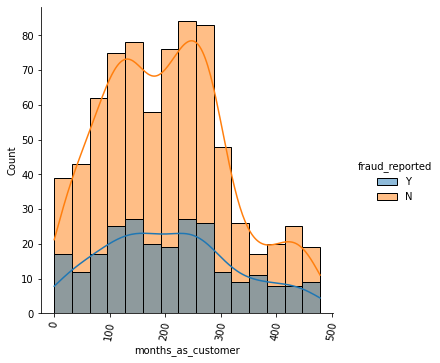

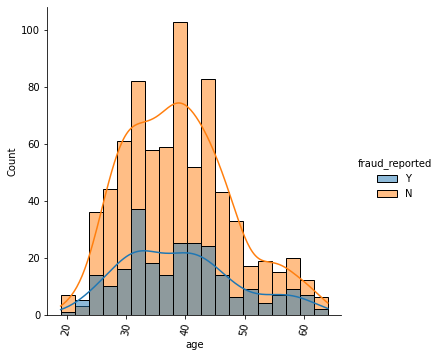

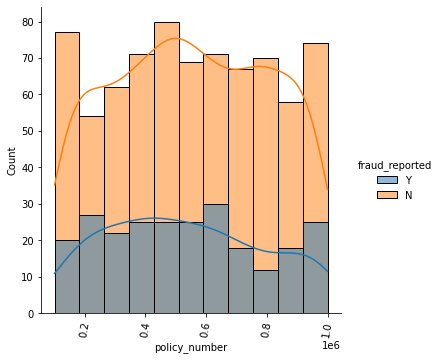

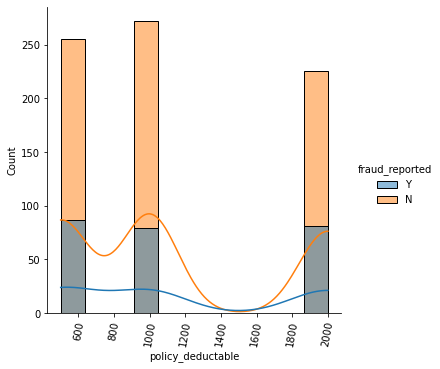

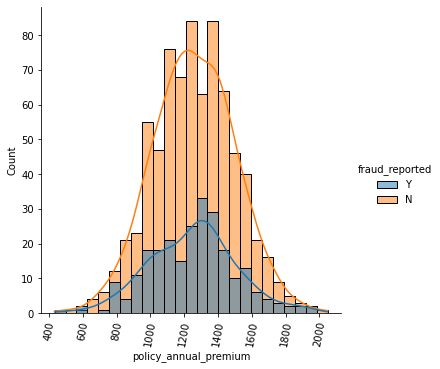

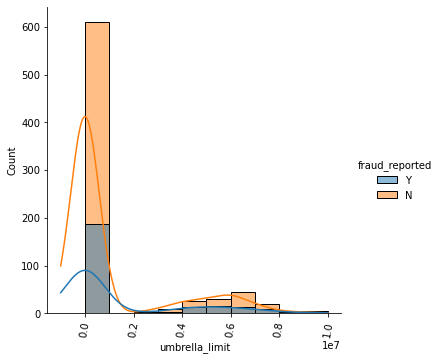

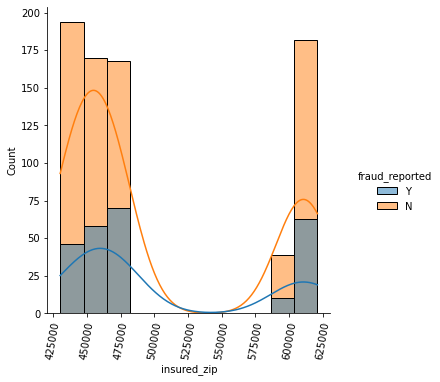

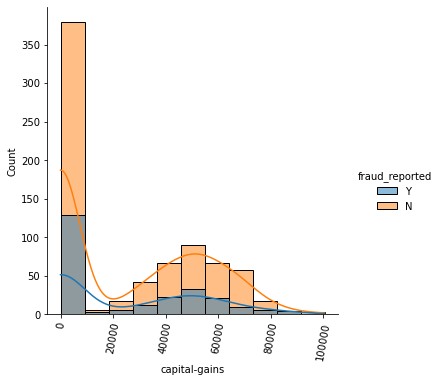

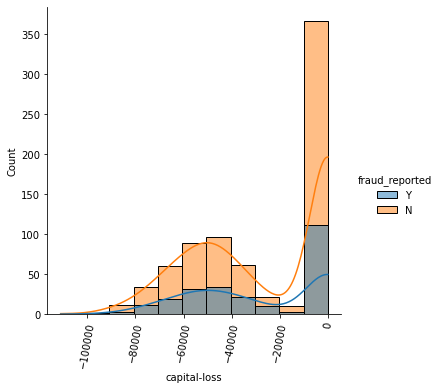

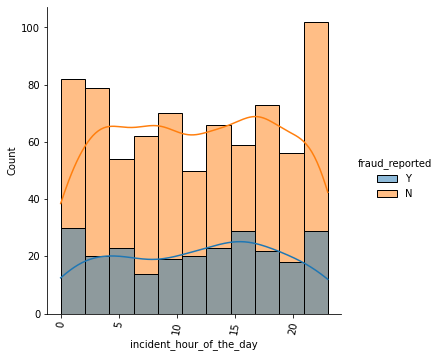

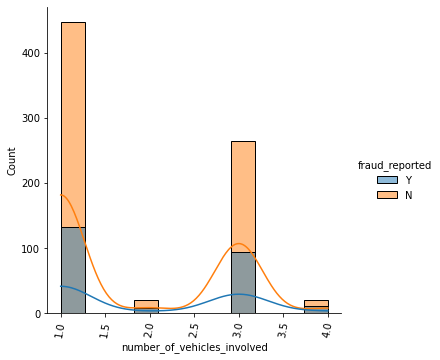

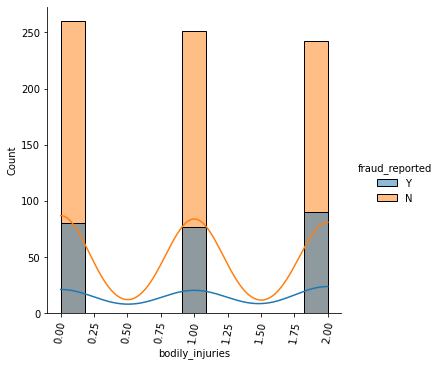

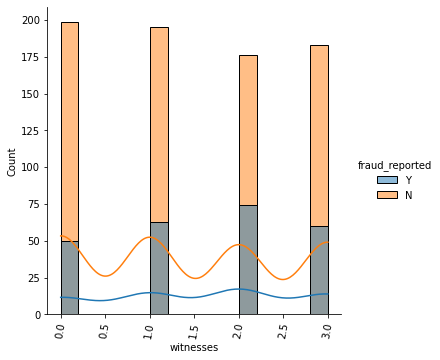

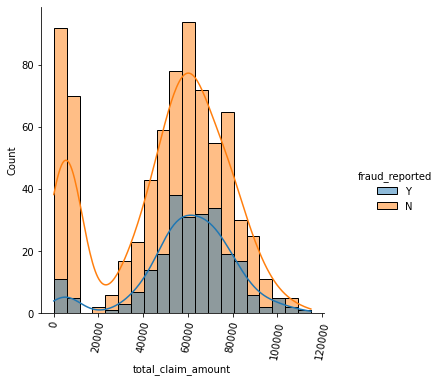

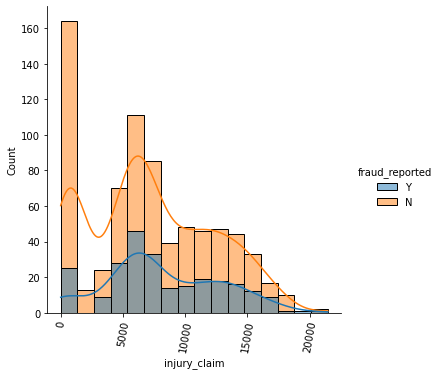

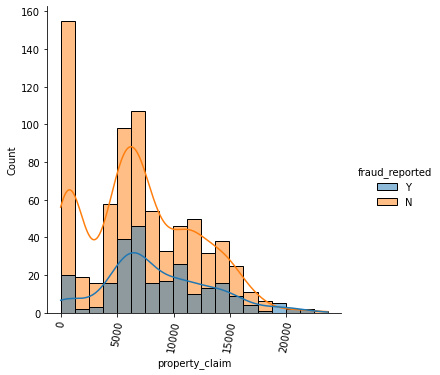

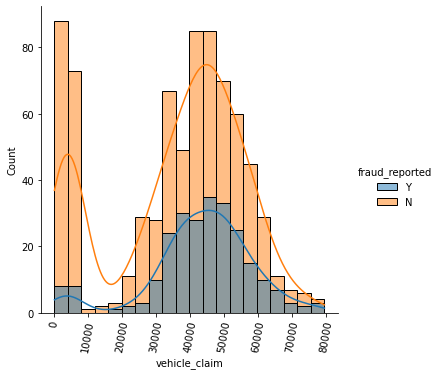

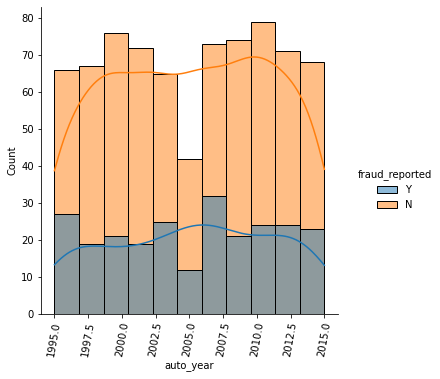

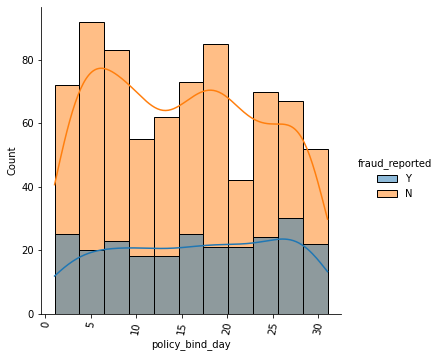

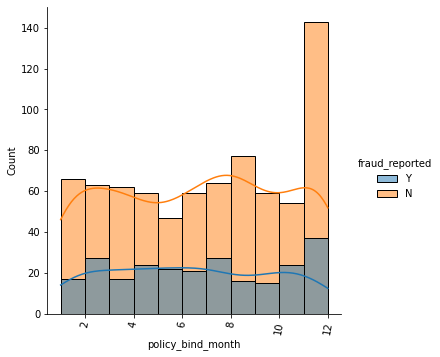

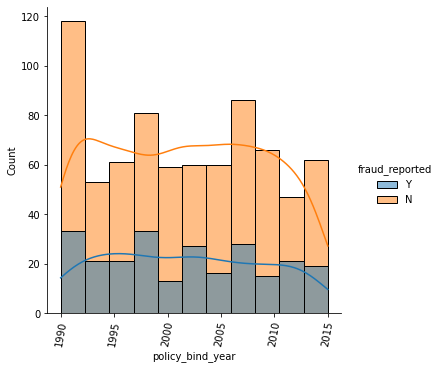

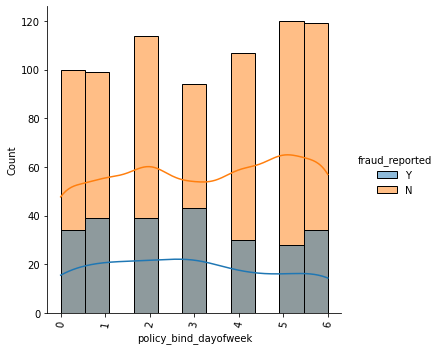

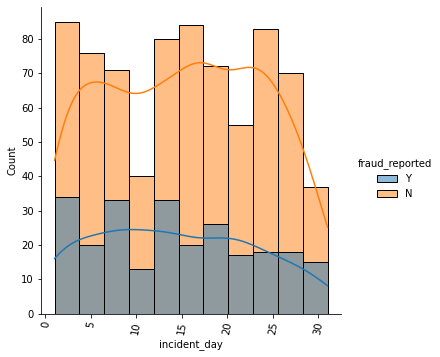

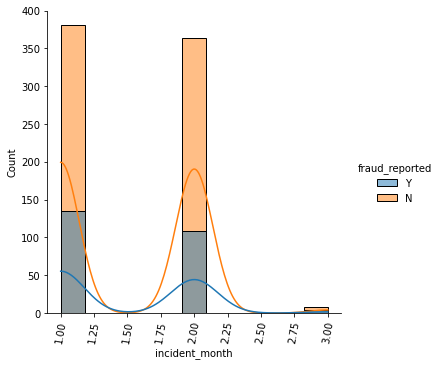

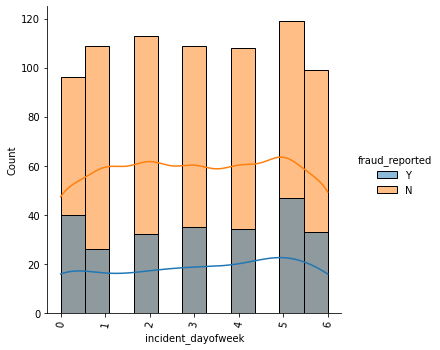

In [177]:
# visualize distribution of numerical features vs target
for col in df[num_columns].columns:
    sns.displot(data=df ,x=col,kde=True,hue='fraud_reported' )
    plt.xticks(rotation=80)
    plt.show()

<AxesSubplot:>

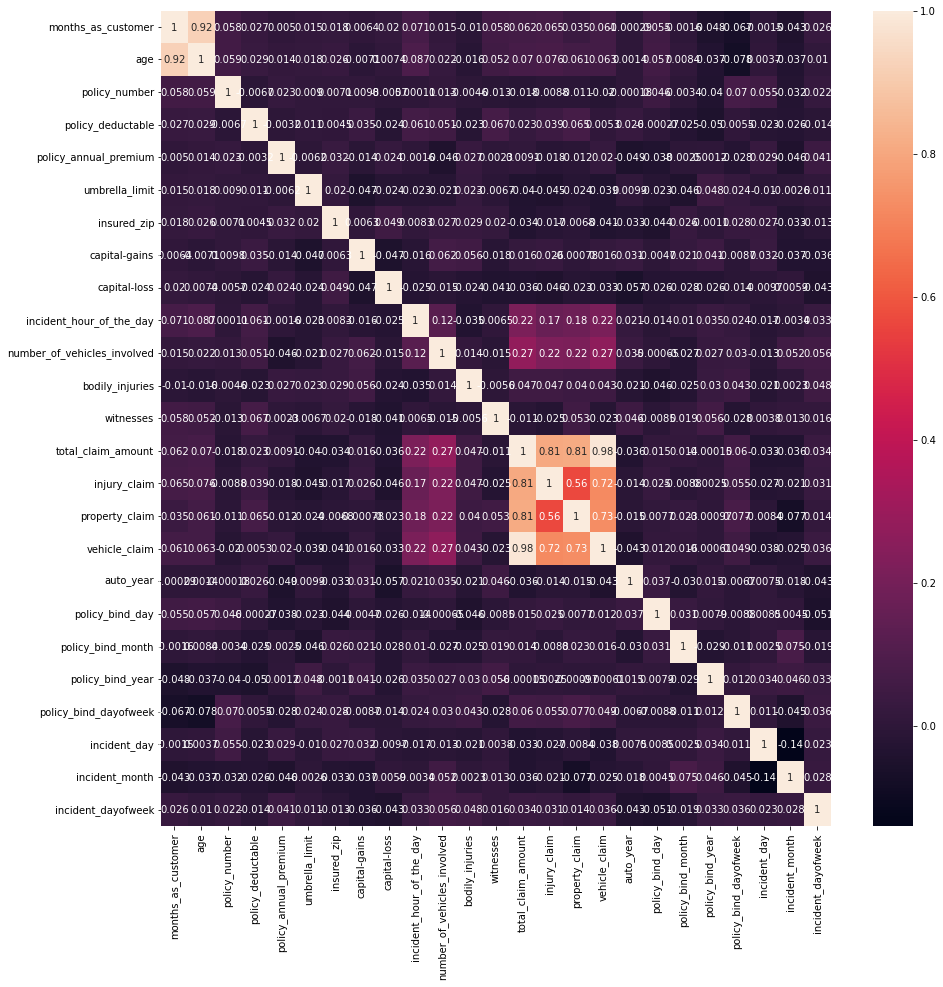

In [178]:
# checking correlation 
plt.figure(figsize=(15,15))
sns.heatmap(df[num_columns].corr(), annot=True )

## Missing Values

**Approaches**

There are 3 features which has missing values : property_damage, police_report_available, collision_type

dropped : 
   * police_report_available 

impute : 
   * collision_type --> No_Collision

   * property_damage --> UNKNOWN

**Note**: try to fill police_report_available instead of removing features.

**property_damage**

In [179]:
df['property_damage'].value_counts(dropna=False) #mode()

NaN    360
NO     338
YES    302
Name: property_damage, dtype: int64

<AxesSubplot:xlabel='property_claim', ylabel='property_damage'>

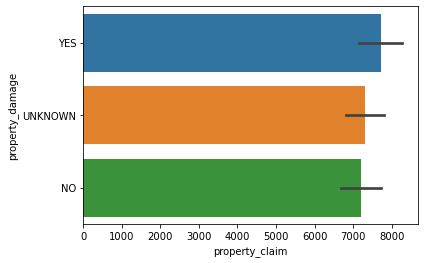

In [180]:
# fill na values with 'UNKNOWN' to show them in the plot
# check relation of propert_damage & propert_claim : if there is no claim maybe propert_damage  = NO
sns.barplot(data =df.fillna('UNKNOWN'),  x='property_claim', y='property_damage')

<AxesSubplot:xlabel='property_claim', ylabel='Count'>

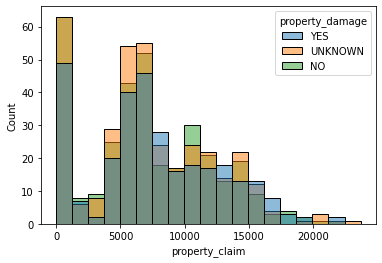

In [181]:
sns.histplot(data = df.fillna('UNKNOWN') , x ='property_claim', hue='property_damage')

In [182]:
# fill nan values with "UNKNOWN"
df['property_damage'].fillna('UNKNOWN', inplace=True)

**police_report_available**

In [183]:
df['police_report_available'].value_counts(dropna=False) #mode()

NaN    343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [184]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,policy_bind_dayofweek,incident_day,incident_month,incident_dayofweek
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,17,10,2014,4,25,1,6
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,8,1,UNKNOWN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,27,6,2006,1,21,1,2
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,6,9,2000,2,22,2,6
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,UNKNOWN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,25,5,1990,4,10,1,5
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,NaN,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,6,6,2014,4,17,2,1


(array([0, 1, 2]),
 [Text(0, 0, 'YES'), Text(1, 0, 'UNKNOWN'), Text(2, 0, 'NO')])

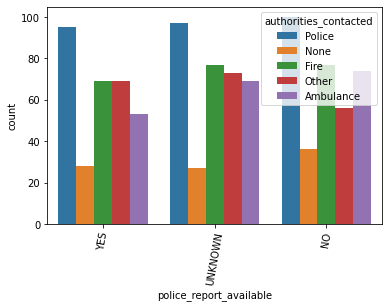

In [185]:
# check with police_report_available & other features['incident_severity','authorities_contacted' bodiliy_injuries', 'insured_education_level', ....] to see if there is ant pattern for police_report_available
sns.countplot(data= df.fillna('UNKNOWN'),x='police_report_available', hue='authorities_contacted')
plt.xticks(rotation=80)

In [186]:
# drop police_report_available due to high volume of missing values, and no relation with the other features
# TODO : try to replace with 'UNKNOWN'
df.drop(['police_report_available'], axis=1, inplace=True)

In [187]:
# remove police_report_available from the categoric column list
cat_columns.remove('police_report_available')

**collision_type**

In [188]:
df['collision_type'].value_counts(dropna=False)

Rear Collision     292
Side Collision     276
Front Collision    254
NaN                178
Name: collision_type, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Single Vehicle Collision'),
  Text(1, 0, 'Vehicle Theft'),
  Text(2, 0, 'Multi-vehicle Collision'),
  Text(3, 0, 'Parked Car')])

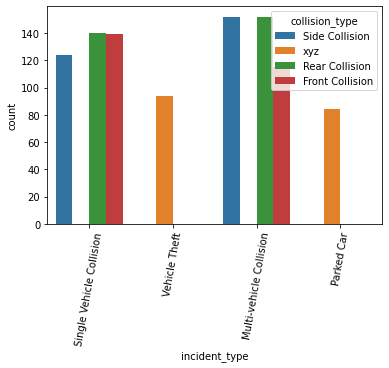

In [189]:
# check relation of incident_type & collision_type 
sns.countplot(data= df.fillna('xyz'),x='incident_type', hue='collision_type')
plt.xticks(rotation=80)

In [190]:
# impute NAN values in the collision_type with 'no-collision'
df['collision_type'].fillna('No-Collision',inplace=True)
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,policy_bind_dayofweek,incident_day,incident_month,incident_dayofweek
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,71610,6510,13020,52080,Saab,92x,2004,Y,17,10,2014,4,25,1,6
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,No-Collision,Minor Damage,Police,VA,Riverwood,8,1,UNKNOWN,0,0,5070,780,780,3510,Mercedes,E400,2007,Y,27,6,2006,1,21,1,2
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,34650,7700,3850,23100,Dodge,RAM,2007,N,6,9,2000,2,22,2,6
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,UNKNOWN,1,2,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,25,5,1990,4,10,1,5
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,No-Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,6500,1300,650,4550,Accura,RSX,2009,N,6,6,2014,4,17,2,1


## Split features and target

In [296]:
X = df[['months_as_customer', 'age','policy_annual_premium','total_claim_amount','incident_severity','insured_hobbies','insured_education_level','insured_occupation']]
y=df['fraud_reported']

In [297]:
# X = df.drop('fraud_reported',axis=1)
# y=df['fraud_reported']

In [298]:
le = LabelEncoder()
y = le.fit_transform(y)

In [299]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

## Feature Encoding

In [300]:
# Encode categoric values
# Scale numeric values
transformer = make_column_transformer(
    (StandardScaler(), [col for col in X_train.columns if df[col].dtype != object]),
    (OneHotEncoder(sparse=False),[col for col in X_train.columns if df[col].dtype == object]),
     remainder='passthrough')


In [301]:
pipeline = Pipeline(
    [('Transformer', transformer),
    ('Model', XGBClassifier())
    ])

pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)

In [302]:
confusion_matrix(y_test,y_pred)

array([[180,  20],
       [ 48,  52]], dtype=int64)

In [303]:
# pipeline1 = Pipeline(
#     [('Transformer', transformer),
#     ('Model', XGBClassifier())
#     ])
# 
# pipeline.fit(X_train,y_train)
# y_pred = pipeline.predict(X_test)

In [304]:
# pipeline2 = Pipeline(
#     [('Transformer', transformer),
#     ('Model', ())
#     ])
# 
# pipeline.fit(X_train,y_train)
# y_pred = pipeline.predict(X_test)

In [305]:
models = {
    "Random Forest": RandomForestClassifier(class_weight="balanced"),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [306]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [307]:
X\

SyntaxError: unexpected EOF while parsing (3964605993.py, line 1)

In [308]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, transfromer, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # encode target  
    y = LabelEncoder().fit_transform(y)
    
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    # pre-process features
    X_train = transformer.fit_transform(X_train)
    X_test = transformer.transform(X_test)
    
    models_list = []
    accuracy_list = []
    recall_list = []
    
    for i in range(len(list(models))):
        
        model = list(models.values())[i]
        
        # Train model
        model.fit(X_train, y_train) 

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        

        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        
        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        
        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        accuracy_list.append(model_test_accuracy)
        recall_list.append(model_test_recall)
        print('='*35)
        print('\n')
        
    report = pd.DataFrame(list(zip(models_list, recall_list)), columns=['Model Name', 'Recall']).sort_values(by=["Recall"])    
    return report

In [309]:
report_pca = evaluate_models(X,y,transformer, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8100
- F1 score: 0.6415
- Precision: 0.6667
- Recall: 0.6182
- Roc Auc Score: 0.7505


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7700
- F1 score: 0.5490
- Precision: 0.5957
- Recall: 0.5091
- Roc Auc Score: 0.6890


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9487
- F1 score: 0.8941
- Precision: 0.8872
- Recall: 0.9010
- Roc Auc Score: 0.9324
----------------------------------
Model performance for Test set
- Accuracy: 0.8050
- F1 score: 0.6609
- Precision: 0.6333
- Recall: 0.6909
- Roc Auc Score: 0.7696


Logistic Regression
Model performance for Training 

In [310]:
report_pca

,Model Name,Recall
4,K-Neighbors Classifier,0.400000
6,AdaBoost Classifier,0.490909
1,Decision Tree,0.509091
5,XGBClassifier,0.509091
3,Logistic Regression,0.600000
0,Random Forest,0.618182
2,Gradient Boosting,0.690909


In [311]:
report_pca

,Model Name,Recall
4,K-Neighbors Classifier,0.400000
6,AdaBoost Classifier,0.490909
1,Decision Tree,0.509091
5,XGBClassifier,0.509091
3,Logistic Regression,0.600000
0,Random Forest,0.618182
2,Gradient Boosting,0.690909


In [233]:
report_pca

,Model Name,Recall
3,Logistic Regression,0.000000
6,AdaBoost Classifier,0.000000
2,Gradient Boosting,0.036364
4,K-Neighbors Classifier,0.054545
0,Random Forest,0.072727
5,XGBClassifier,0.163636
1,Decision Tree,0.272727
